<a href="https://colab.research.google.com/github/Tejas-Chaudhari-007/MM-749-Statistics-and-Probability/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

# Define class used to print output in different colors
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Define function used to convert input(str/int/float) to bold for printing later
def bold(input):
  return color.BOLD+str(input)+color.END

In [ ]:
df = pd.read_csv("/content/Metallic_Glass_Forming_with_features.csv")
df.head(5)

,Material compositions,main_element,Trg,Density_composition_average,IsBoron_composition_average,IsDBlock_composition_average,IsTransitionMetal_composition_average,NdValence_composition_average,NValance_composition_average,HeatVaporization_max_value,BoilingT_difference,HeatVaporization_difference,MeltingT_difference,NdValence_difference,NsUnfilled_difference,valence_difference,Site1_Density,Site1_HeatCapacityMass,Site1_HeatFusion,Site1_IsDBlock,Site1_IsTransitionMetal,Site1_NdValence,Site1_SpecificHeatCapacity
0,Ag10Cu35Zr55,Zr,0.534,0.579069,-0.5856,1.029882,1.029882,0.589536,0.217571,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.31768,-0.884994
1,Ag10Cu50Zr40,Cu,0.608,0.748401,-0.5856,1.029882,1.029882,1.176250,0.653969,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.31768,-0.884994
2,Ag10Cu55Zr35,Cu,0.609,0.804845,-0.5856,1.029882,1.029882,1.371822,0.799435,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.31768,-0.884994
3,Ag20Cu40Zr40,Cu,0.577,0.821973,-0.5856,1.029882,1.029882,1.176250,0.653969,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.31768,-0.884994
4,Ag35Ca65,Ca,0.515,-0.860992,-0.5856,-0.998961,-0.998961,-0.437214,-0.613663,-1.684370,-1.368929,-1.228445,-1.429884,1.005911,0.857849,-1.745035,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.31768,-0.884994


In [ ]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns ({df.shape[0]*df.shape[1]} values in total).")
print(f"There are {df.isna().sum().sum()} missing values.")


There are 585 rows and 23 columns (13455 values in total).
There are 0 missing values.


In [ ]:
numerical_variables = df.dtypes[df.dtypes == 'float64'].index.tolist()
categorical_values_main_element = ['main_element'] 

print(f"There are {len(numerical_variables)} numerical  variables.")
print(f"There are {len(categorical_values_main_element)} categorical values in main element column")


There are 21 numerical  variables.
There are 1 categorical values in main element column


In [ ]:
# Descriptive statistics - 1
df.agg('describe')

,Trg,Density_composition_average,IsBoron_composition_average,IsDBlock_composition_average,IsTransitionMetal_composition_average,NdValence_composition_average,NValance_composition_average,HeatVaporization_max_value,BoilingT_difference,HeatVaporization_difference,MeltingT_difference,NdValence_difference,NsUnfilled_difference,valence_difference,Site1_Density,Site1_HeatCapacityMass,Site1_HeatFusion,Site1_IsDBlock,Site1_IsTransitionMetal,Site1_NdValence,Site1_SpecificHeatCapacity
count,585.000000,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02
mean,0.577388,1.709548e-12,3.589773e-11,1.367487e-11,1.367487e-11,-2.735036e-11,2.564102e-11,-1.709404e-10,-4.444438e-11,-4.273485e-11,-8.888876e-11,5.128154e-11,-2.051289e-10,-6.666643e-11,-1.094010e-10,-5.982756e-11,-4.444199e-11,-3.333350e-10,-3.333350e-10,9.743488e-11,-7.521228e-11
std,0.048344,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00,1.000856e+00
min,0.223000,-2.296437e+00,-5.856000e-01,-2.091415e+00,-2.091415e+00,-2.148464e+00,-1.922857e+00,-2.436709e+00,-2.118943e+00,-1.844594e+00,-1.435136e+00,-1.654388e+00,-1.165706e+00,-1.745035e+00,-1.468652e+00,-1.279271e+00,-1.740832e+00,-1.392731e+00,-1.392731e+00,-1.106354e+00,-1.280819e+00
25%,0.557000,-6.580370e-01,-5.856000e-01,-1.155026e+00,-1.155026e+00,-8.435138e-01,-7.092550e-01,-7.405890e-01,-5.225718e-01,-7.852091e-01,-5.909934e-01,-8.562979e-01,-1.165706e+00,-7.402658e-01,-6.318278e-01,-7.279791e-01,-1.062409e+00,-1.392731e+00,-1.392731e+00,-1.106354e+00,-7.259236e-01
50%,0.584000,1.412969e-01,-5.856000e-01,3.744096e-01,3.744096e-01,4.682513e-02,5.548036e-02,5.639150e-01,1.006106e-01,1.760586e-01,-2.355999e-01,4.738515e-01,8.578491e-01,2.645033e-01,9.502333e-02,-3.320846e-01,5.214307e-02,7.180140e-01,7.180140e-01,-6.215474e-01,-3.300981e-01
75%,0.609000,4.915096e-01,2.045356e-01,8.269977e-01,8.269977e-01,7.851073e-01,4.877221e-01,5.639150e-01,4.384218e-01,5.057478e-01,2.300710e-01,1.005911e+00,8.578491e-01,2.645033e-01,6.420232e-01,1.822082e-01,7.437820e-01,7.180140e-01,7.180140e-01,1.317680e+00,1.804059e-01
max,0.688000,4.418691e+00,6.479041e+00,1.029882e+00,1.029882e+00,2.496357e+00,6.272280e+00,1.533032e+00,3.247621e+00,3.084747e+00,3.822408e+00,1.005911e+00,8.578491e-01,2.274041e+00,4.127357e+00,4.995841e+00,3.664525e+00,7.180140e-01,7.180140e-01,1.317680e+00,4.996900e+00


Observations:
1. Seems like the data is already standardized as the mean and standard deviations of the features are already 0 and 1.

Next:
1. Transform back the data from standardized to the original to perform the further EDA and parametric density estimation.

In [ ]:
# Data types (object - categorical, 'float64' - numerical)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Material compositions                  585 non-null    object 
 1   main_element                           585 non-null    object 
 2   Trg                                    585 non-null    float64
 3   Density_composition_average            585 non-null    float64
 4   IsBoron_composition_average            585 non-null    float64
 5   IsDBlock_composition_average           585 non-null    float64
 6   IsTransitionMetal_composition_average  585 non-null    float64
 7   NdValence_composition_average          585 non-null    float64
 8   NValance_composition_average           585 non-null    float64
 9   HeatVaporization_max_value             585 non-null    float64
 10  BoilingT_difference                    585 non-null    float64
 11  HeatVa

In [ ]:
# Descriptive statistics - 2
required_functions_list = ['var', 'kurtosis', 'skew']
df.agg(required_functions_list)

,Trg,Density_composition_average,IsBoron_composition_average,IsDBlock_composition_average,IsTransitionMetal_composition_average,NdValence_composition_average,NValance_composition_average,HeatVaporization_max_value,BoilingT_difference,HeatVaporization_difference,MeltingT_difference,NdValence_difference,NsUnfilled_difference,valence_difference,Site1_Density,Site1_HeatCapacityMass,Site1_HeatFusion,Site1_IsDBlock,Site1_IsTransitionMetal,Site1_NdValence,Site1_SpecificHeatCapacity
var,0.002337,1.001712,1.001712,1.001712,1.001712,1.001712,1.001712,1.001712,1.001712,1.001712,1.001712,1.001712,1.001712,1.001712,1.001712,1.001712,1.001712,1.001712,1.001712,1.001712,1.001712
kurtosis,7.127936,1.387157,19.471651,-1.171041,-1.171041,-0.695931,6.921015,-0.820099,2.295467,1.674056,4.748327,-1.101754,-1.911282,-0.648811,1.388066,4.361955,-0.311311,-1.547715,-1.547715,-1.664479,4.352229
skew,-1.759822,0.242647,3.714128,-0.662458,-0.662458,-0.019795,1.637832,-0.472850,0.791967,0.839328,1.862502,-0.653202,-0.308649,-0.319356,0.428116,1.750919,0.359620,-0.676452,-0.676452,0.228546,1.743029


In [ ]:
# Check unique values and null entries
for column_name in df.columns.values:  # Iterate over each column
  # Store the required values in variables
  unique_values_list = pd.unique(df[column_name])  # Store the list of unique values in the column
  data_type = df[column_name].dtypes
  number_of_na_values = df[column_name].isna().sum()

  # Print the required output
  print(f'{bold(column_name)} is a type of {bold(data_type)}, has {bold(len(unique_values_list))} unique values,\
   and {bold(number_of_na_values)} NaN entries')
  
  # Print unique values list if the columns has small number (less than 10) of unique values
  if len(unique_values_list) < 10:
      print(f'The unique values are {bold(unique_values_list)}')

Material compositions is a type of object, has 585 unique values,   and 0 NaN entries
main_element is a type of object, has 27 unique values,   and 0 NaN entries
Trg is a type of float64, has 174 unique values,   and 0 NaN entries
Density_composition_average is a type of float64, has 585 unique values,   and 0 NaN entries
IsBoron_composition_average is a type of float64, has 63 unique values,   and 0 NaN entries
IsDBlock_composition_average is a type of float64, has 123 unique values,   and 0 NaN entries
IsTransitionMetal_composition_average is a type of float64, has 123 unique values,   and 0 NaN entries
NdValence_composition_average is a type of float64, has 299 unique values,   and 0 NaN entries
NValance_composition_average is a type of float64, has 369 unique values,   and 0 NaN entries
HeatVaporization_max_value is a type of float64, has 25 unique values,   and 0 NaN entries
BoilingT_difference is a type of float64, has 83 unique values,   and 0 NaN entries
HeatVaporization_differ

Text(0.5, 1.0, 'Correlation Matrix for Metallic Glasses GFA')

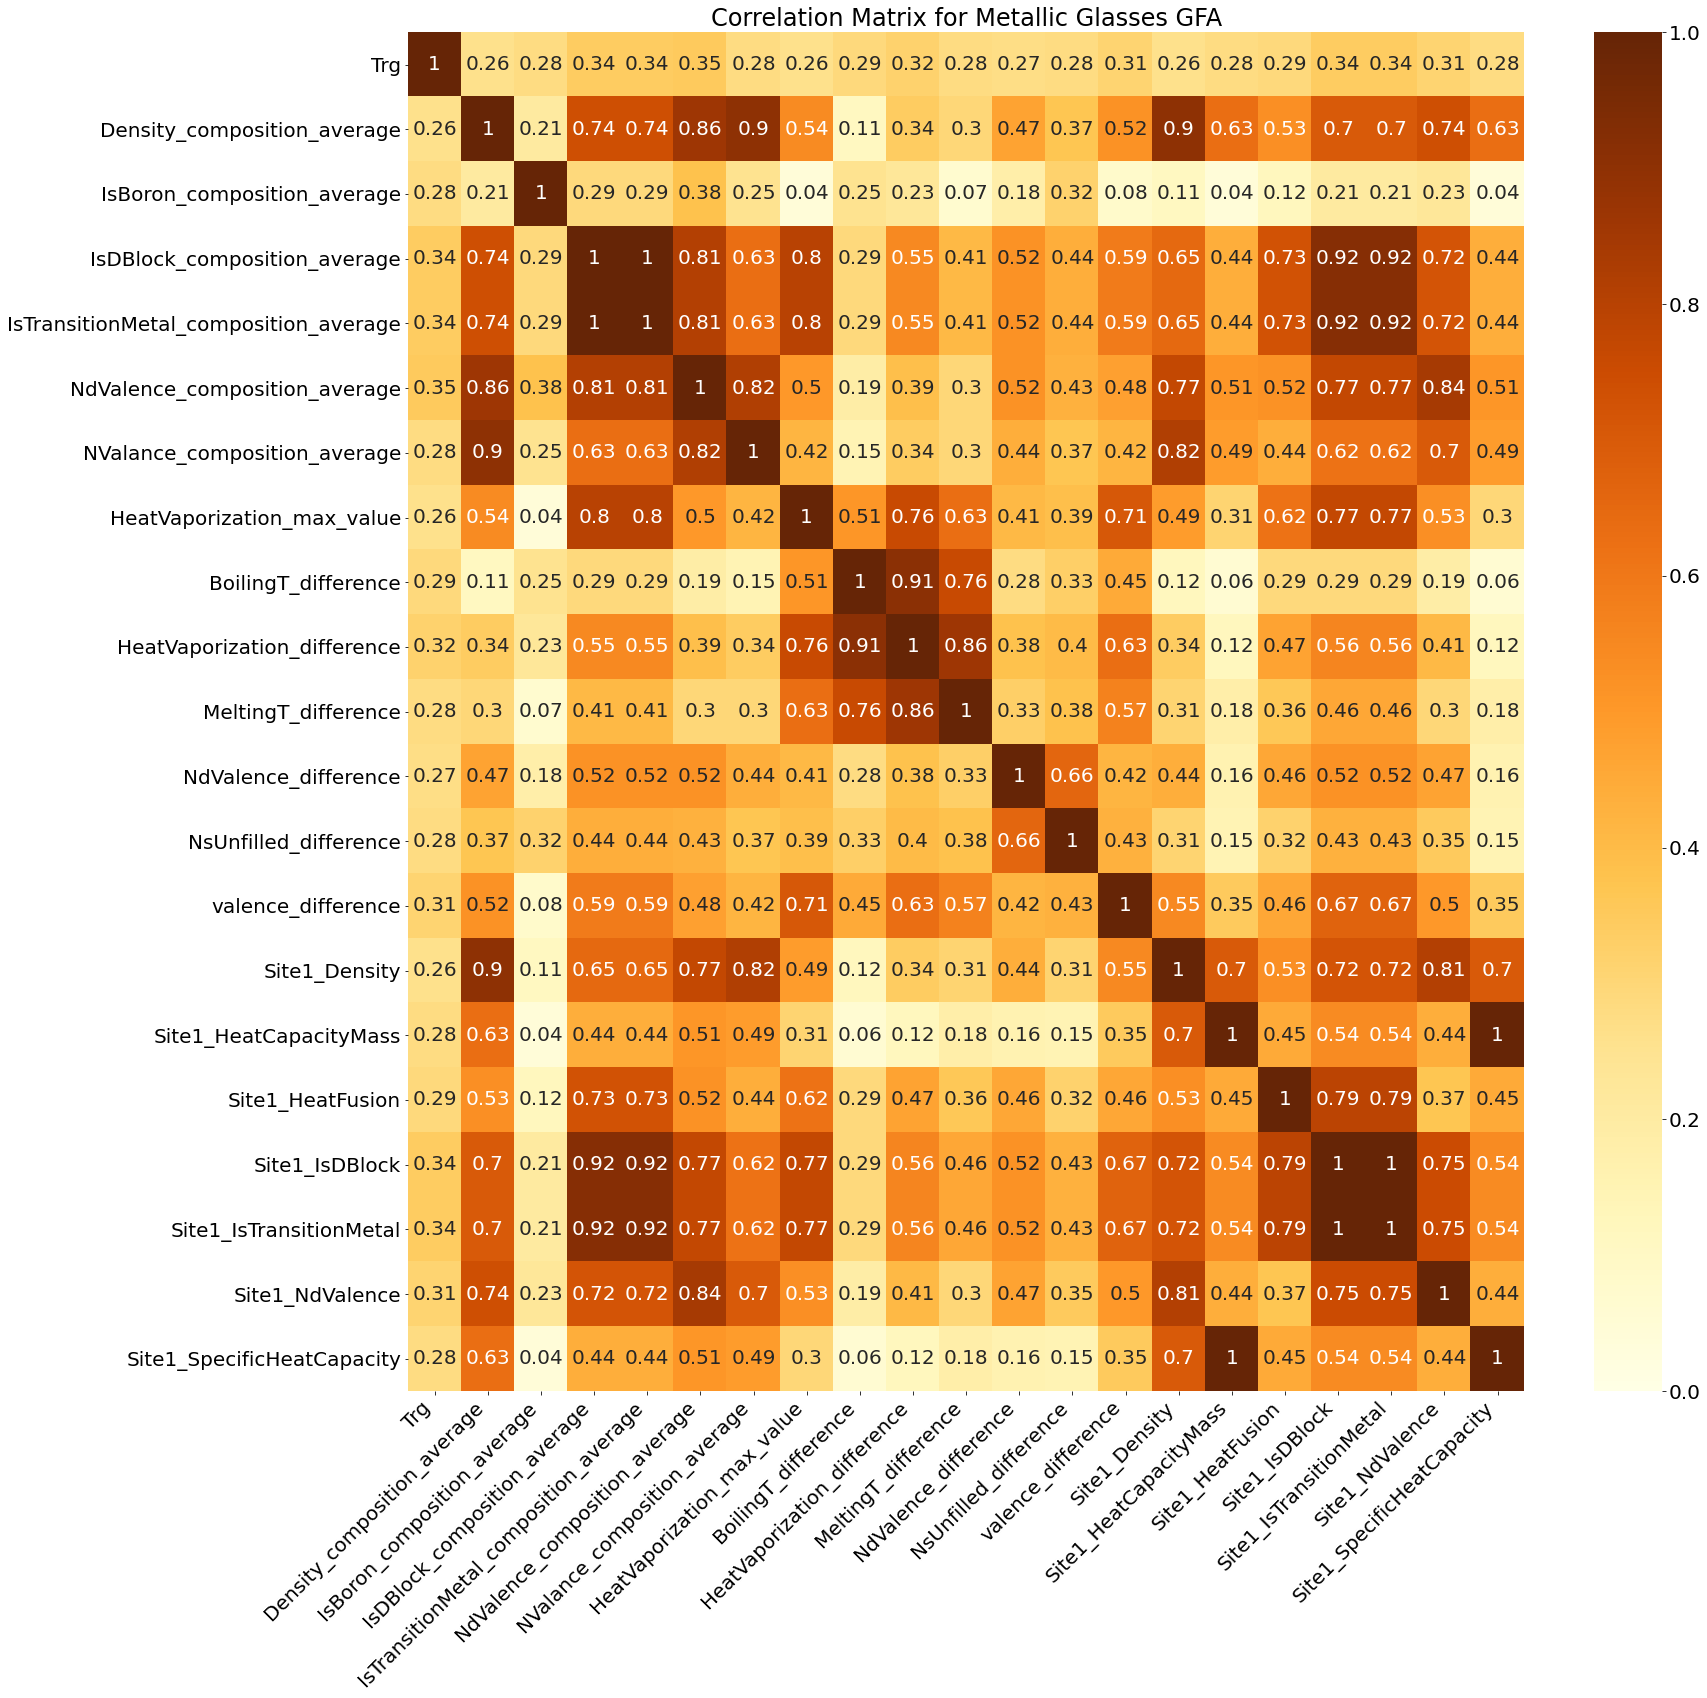

In [ ]:
# Calculate the correlations
column_names = df.columns.values[2:]
correlation_matrix = df[column_names].corr().round(2)

# Plot correlation heatmap
plt.rcParams['font.size'] = 20
plt.figure(figsize = (25, 25))
correlation_matrix_heatmap = sns.heatmap(abs(correlation_matrix), annot=True, cmap='YlOrBr', center=0.5, vmin=0, vmax=1)
correlation_matrix_heatmap.set_xticklabels(correlation_matrix_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Correlation Matrix for Metallic Glasses GFA")

Text(0.5, 1.0, 'Box-Whisker Plot for Metallic Glasses GFA')

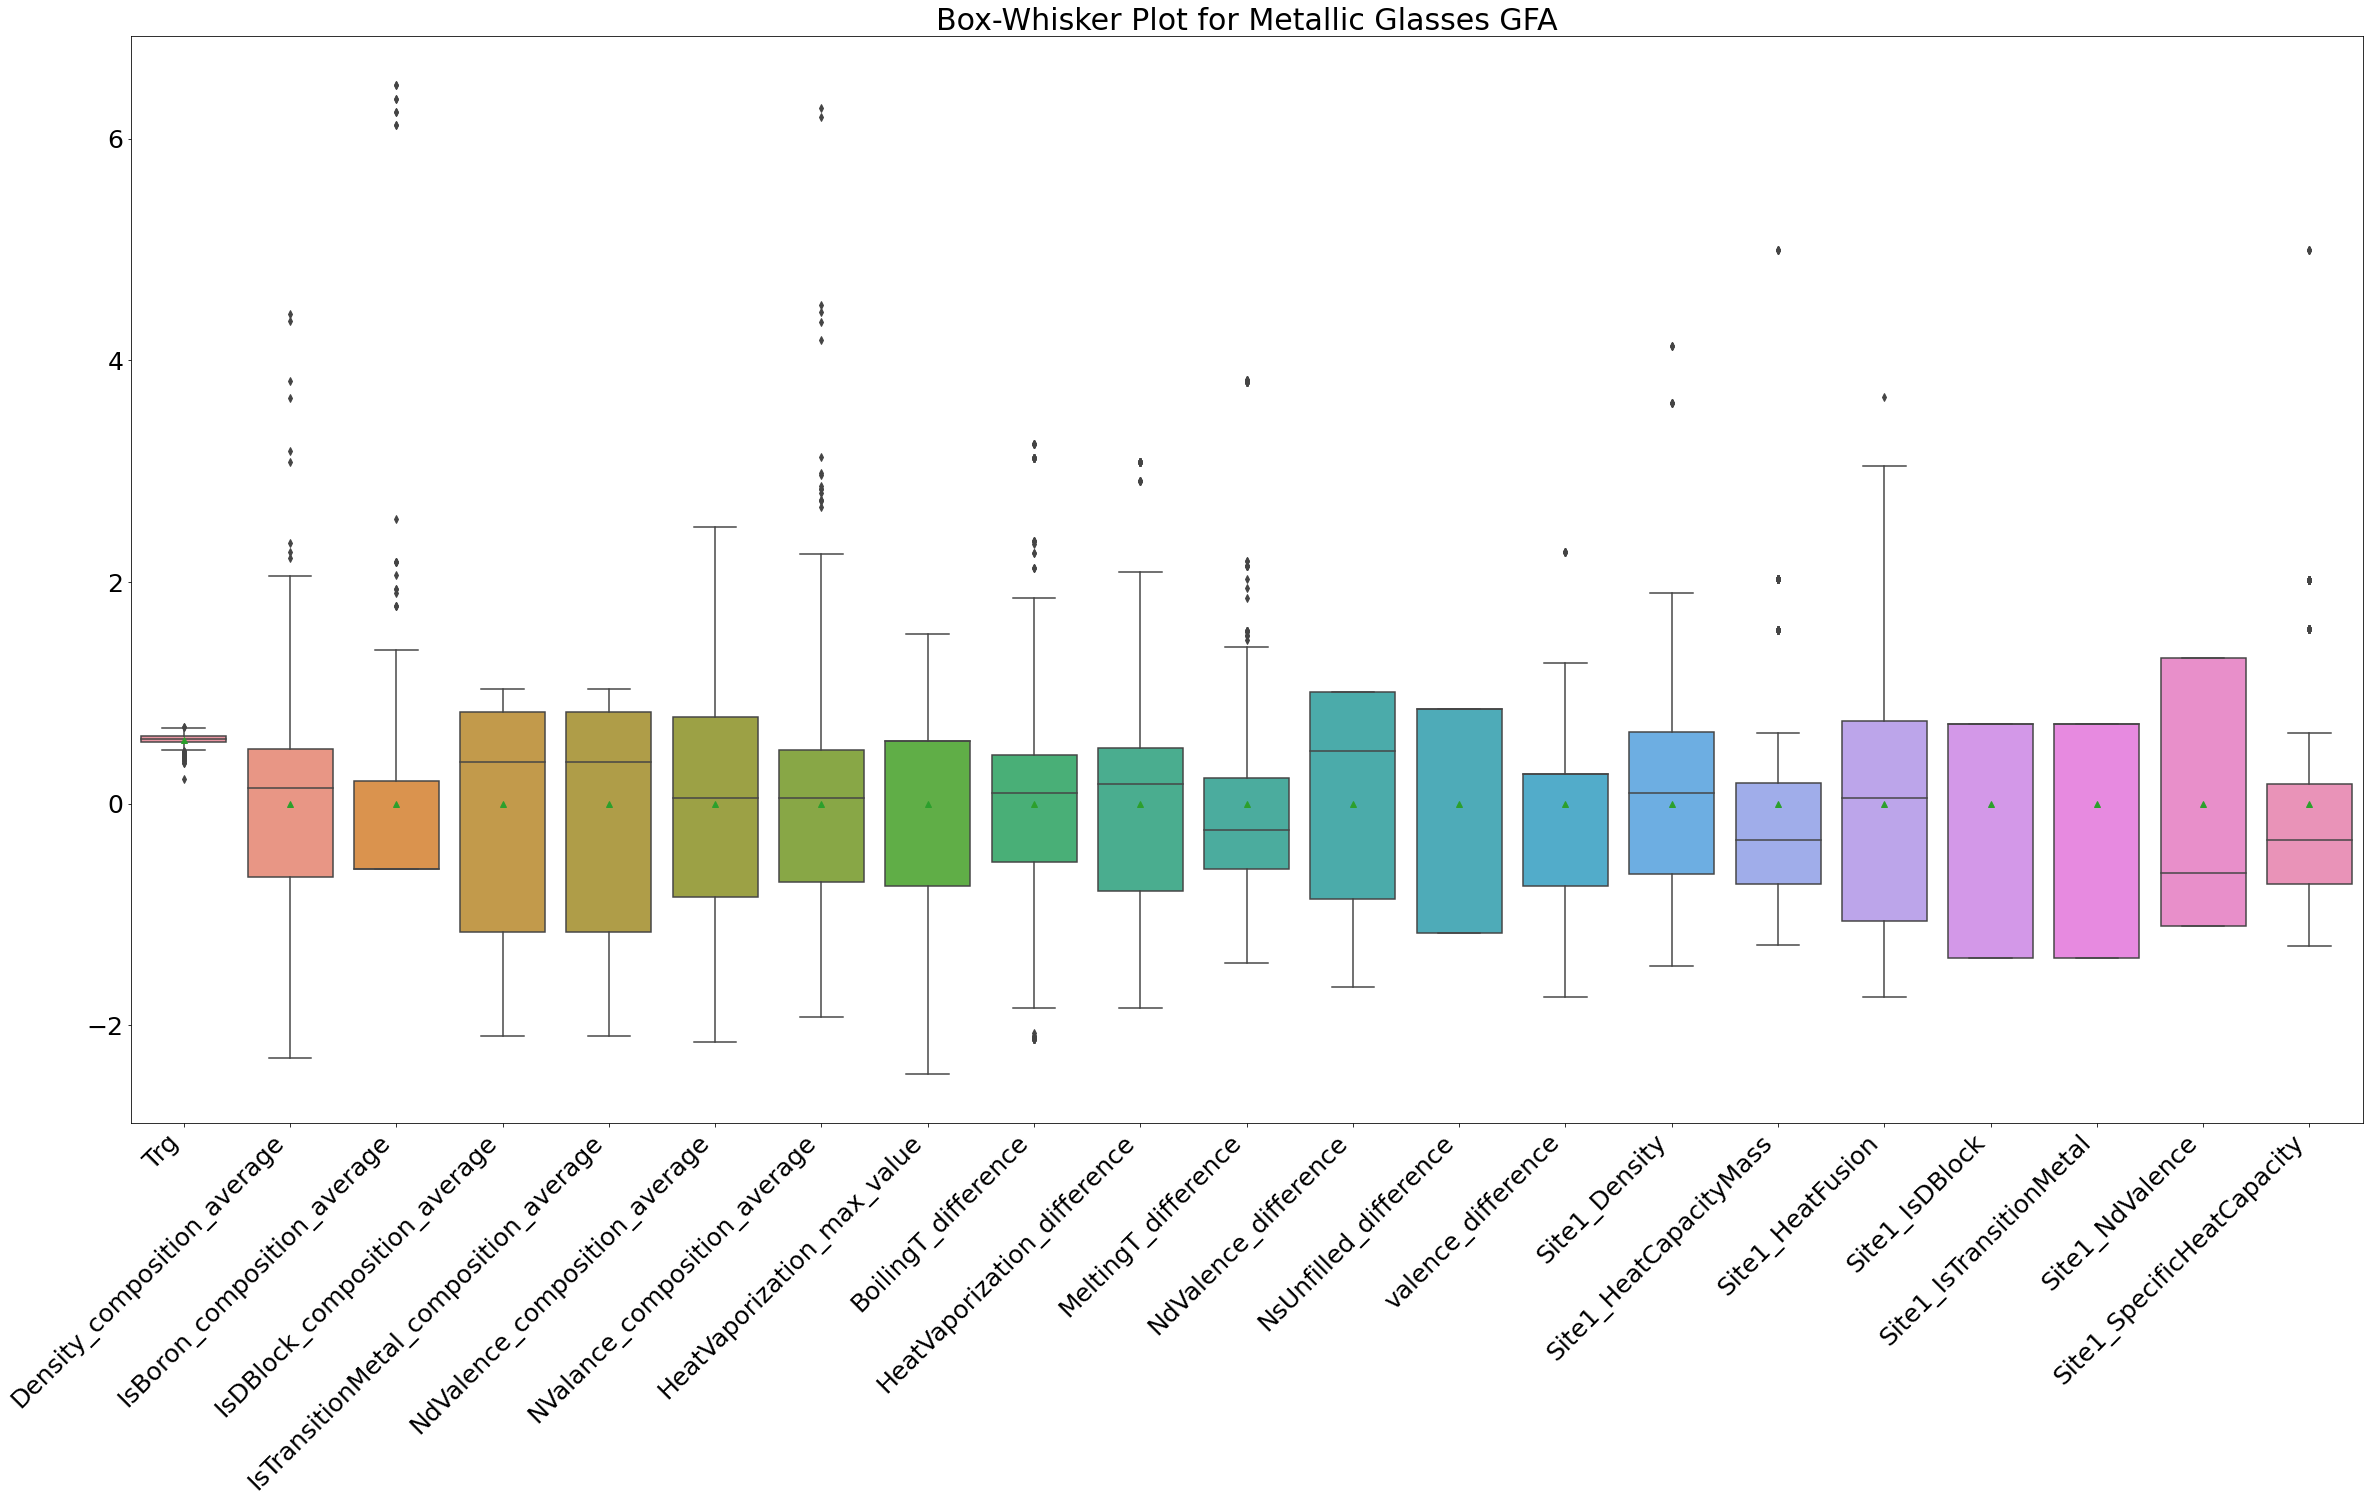

In [ ]:
# Plot Box-Whisker plot
plt.rcParams['font.size'] = 25
plt.figure(figsize = (40, 20))
boxplot = sns.boxplot(data=df, showmeans=True)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Box-Whisker Plot for Metallic Glasses GFA")

<Figure size 2880x1440 with 0 Axes>

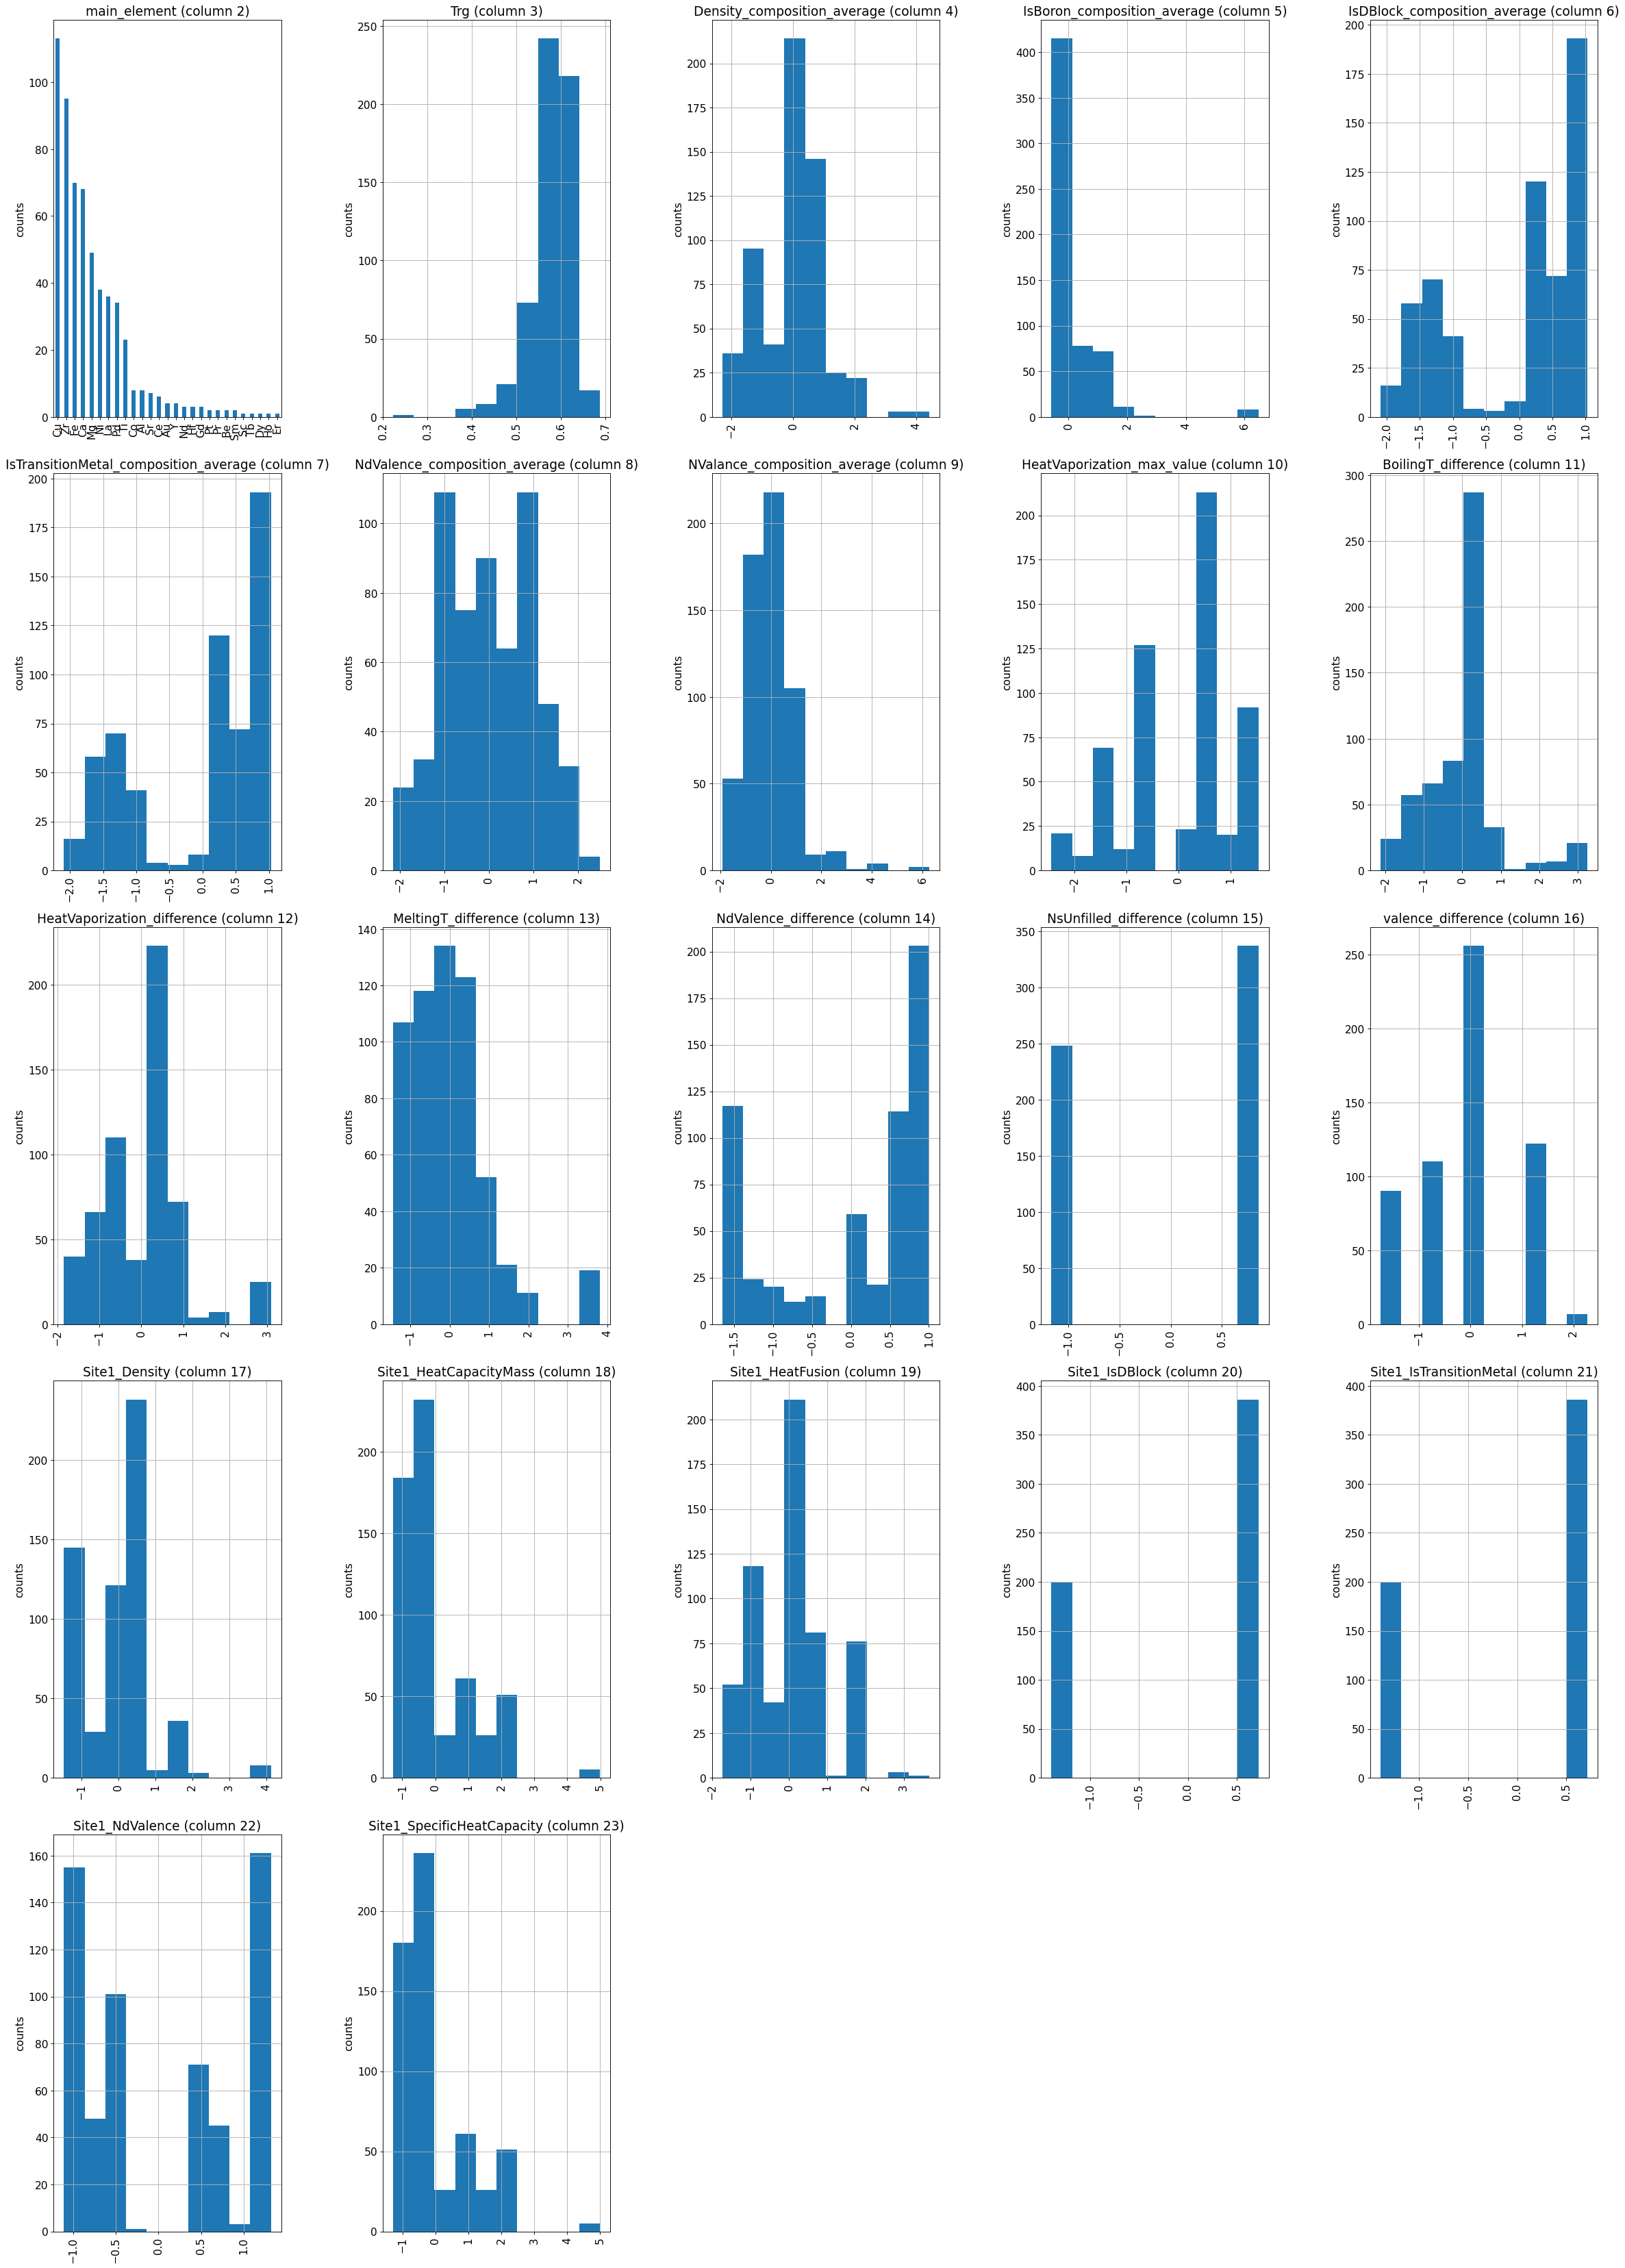

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    
    df1 = df[[col for col in df if col != 'Material compositions']] # For displaying purposes, pick columns that have greater than 1  unique values and skip the 'Material compositions' column
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df1.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i+2})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plt.rcParams['font.size'] = 14
plt.figure(figsize = (40, 20))
plotPerColumnDistribution(df, 22, 5)

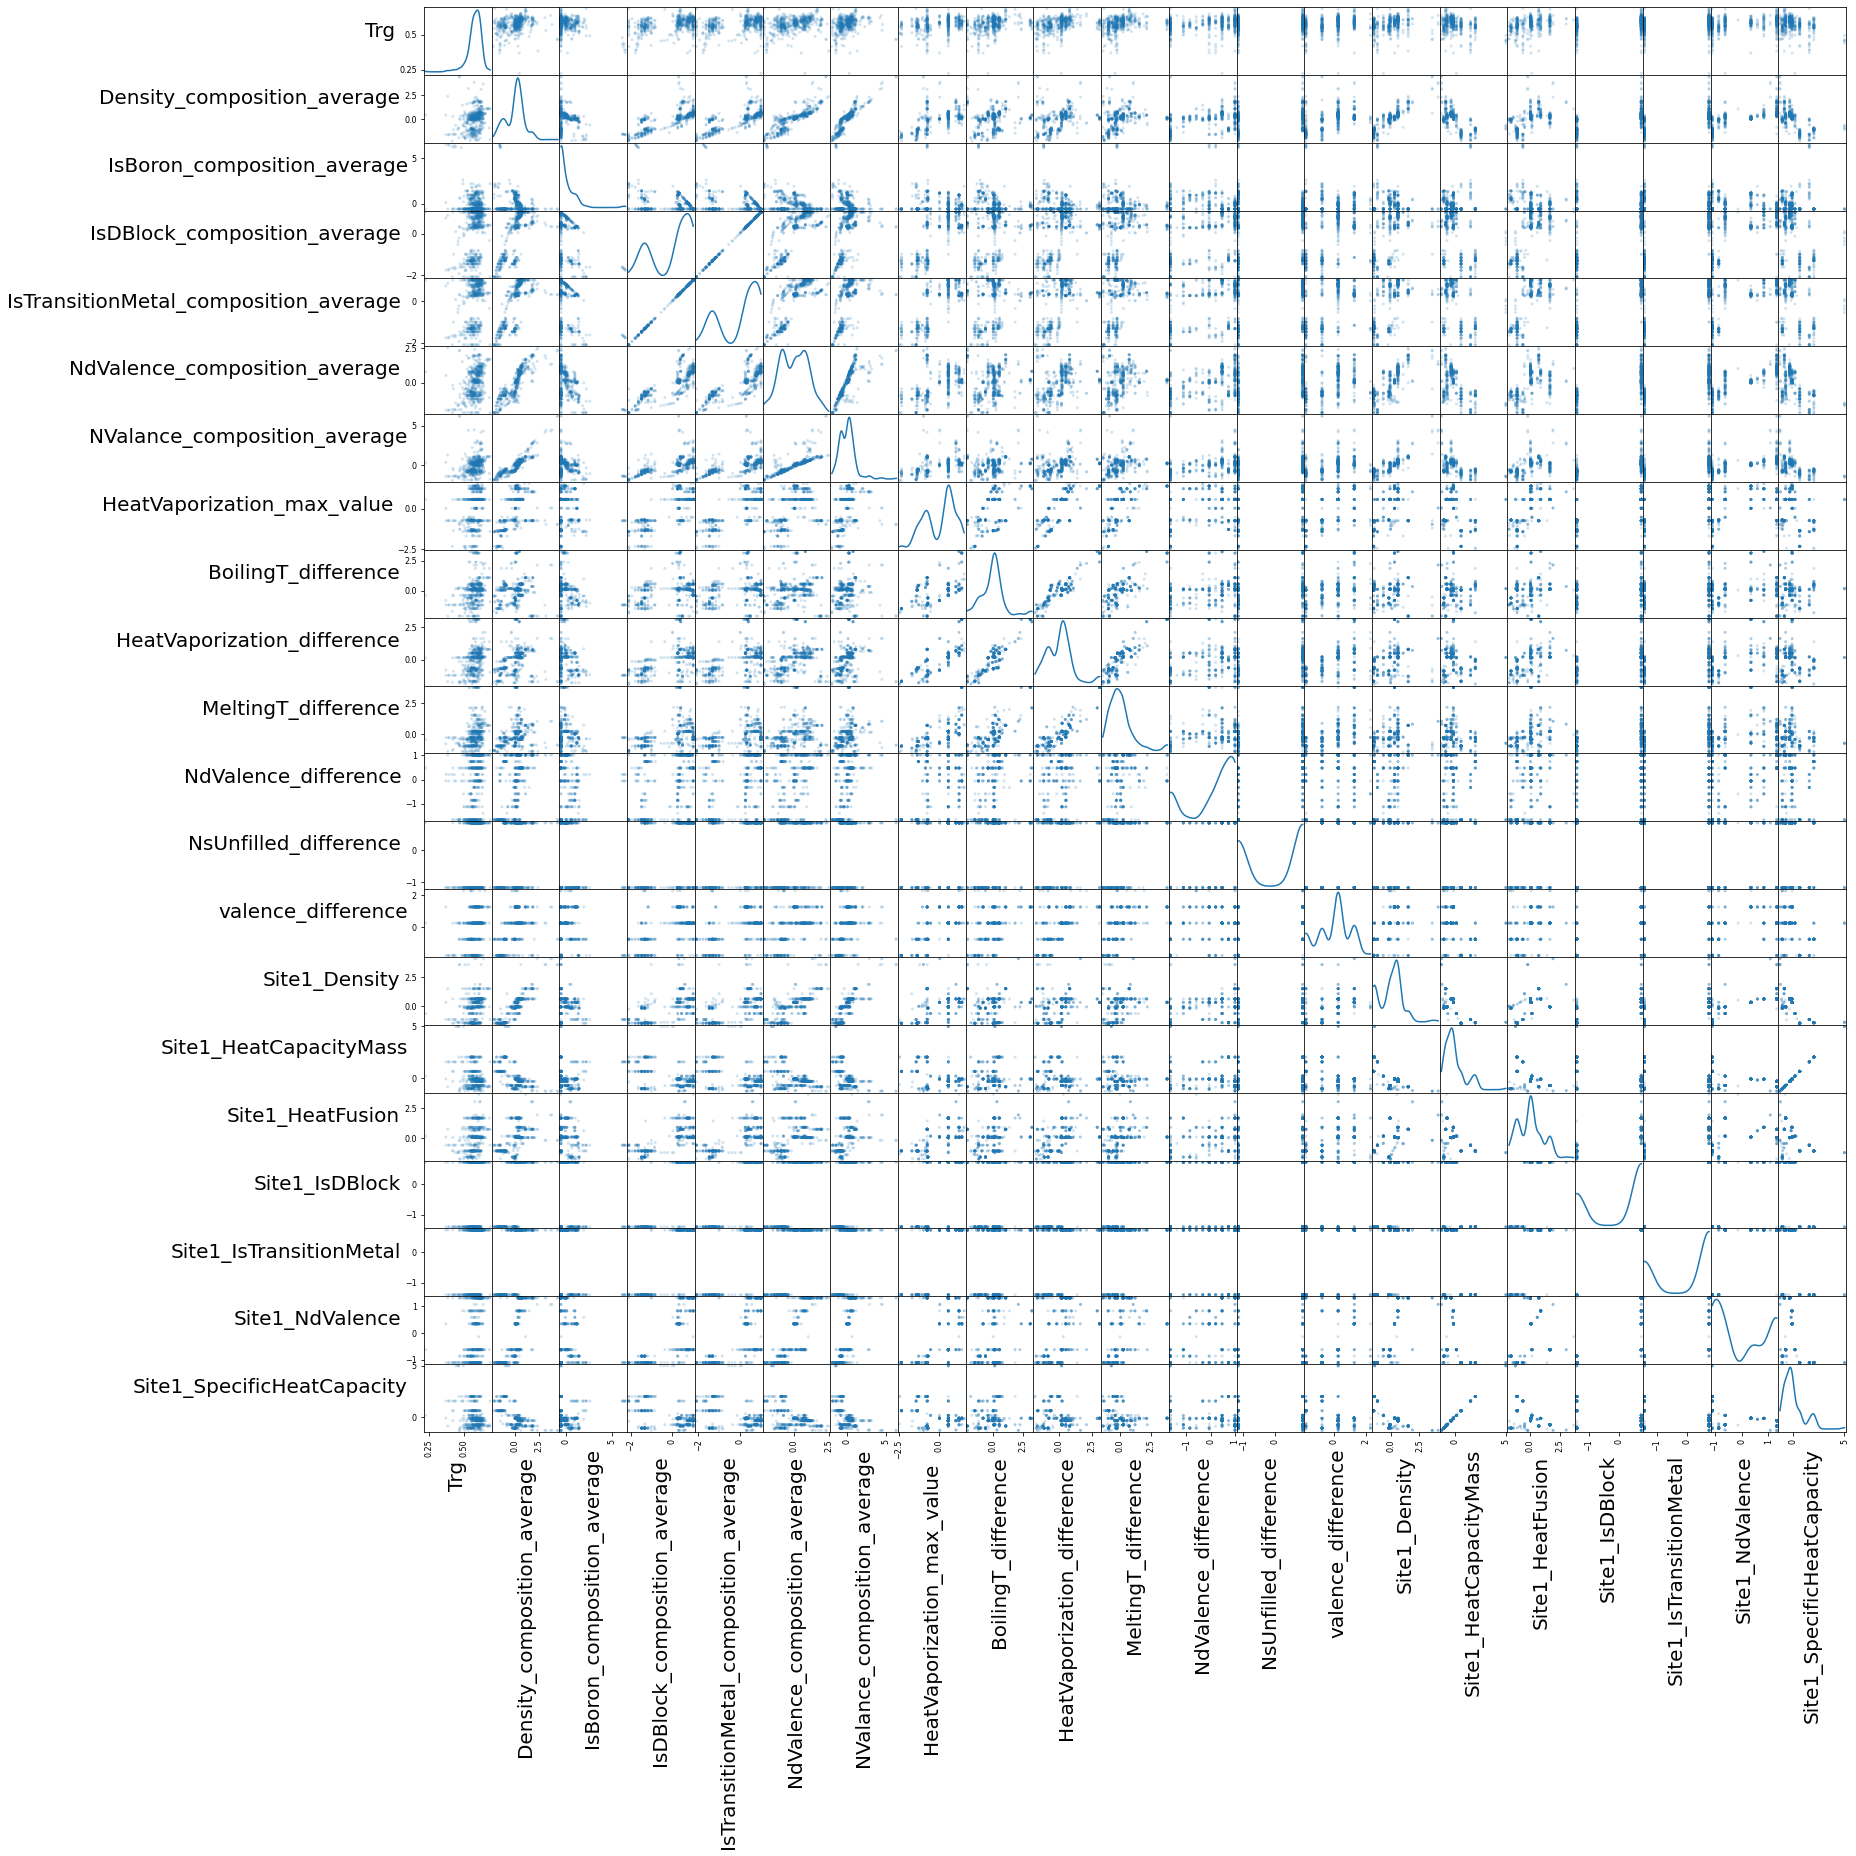

In [ ]:
# We can plot pair-wise scatter matrices (lazy coding)

axes = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(26, 26), diagonal='kde') # 'kde' is kernel density estimation
# 'alpha' argument is the 'opacitty'
# 'kde' is the estimation for the smoothened histograms

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.xaxis.label.set_fontsize(20)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_fontsize(20)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()